# Basic EDA
In this notebook we perform a basic Exploratory Data Analysis on the fish weight dataset, taken from [here](https://www.kaggle.com/datasets/aungpyaeap/fish-market).

The dataset contains information on seven different species of fish. We have different measurements for the fish:
- Length 1: Vertical Length in cm
- Length 2: Diagonal Length in cm
- Length 3: Cross Length in cm
- Height: Height in cm
- Width: Diagonal Width in cm

We also have the weight in grams. 

**Goal:** Our goal is predict the weight of the fish based on the 5 other measurements. 

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read in
df = pd.read_csv("data/Fish.csv")

In [3]:
#Preview
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Check for missing values


In [5]:
#We are expecting 7 species of fish
df.Species.nunique()==7

True

In [9]:
#Do we have any missing values (nulls)?
df.isnull().values.any()


False

## Check for *unusual* values

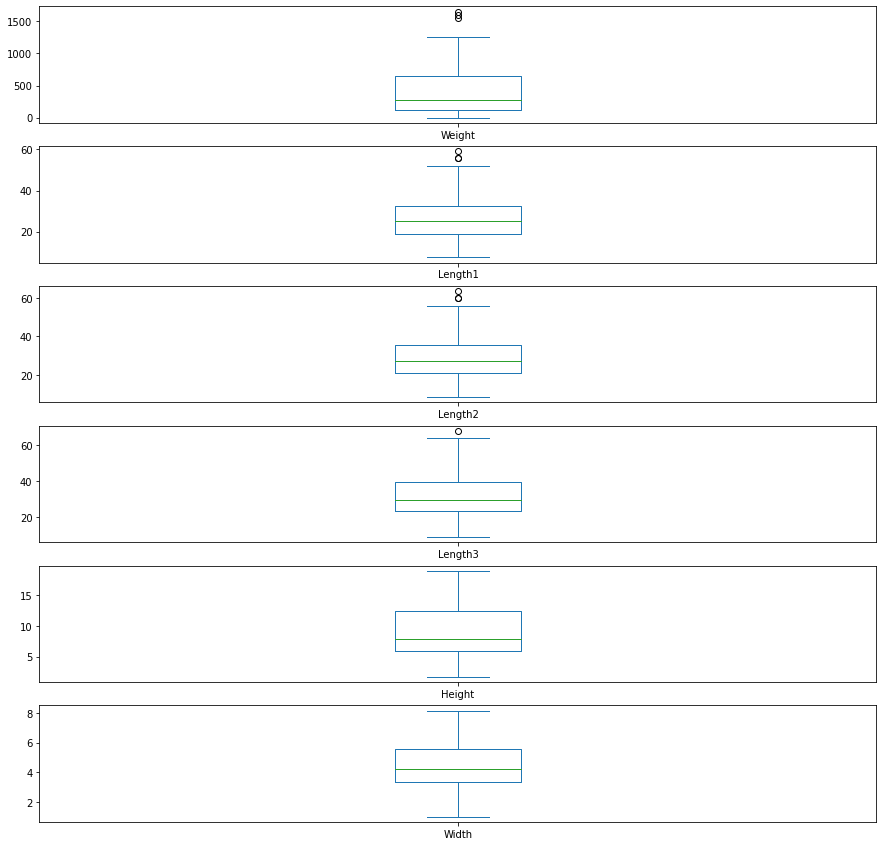

In [34]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15,15))

df['Weight'].plot(kind='box', ax=axes[0])
df['Length1'].plot(kind='box', ax=axes[1])
df['Length2'].plot(kind='box', ax=axes[2])
df['Length3'].plot(kind='box', ax=axes[3])
df['Height'].plot(kind='box', ax=axes[4])
df['Width'].plot(kind='box', ax=axes[5])
plt.show()

There are a few outliers in some of the variables. However there is nothing so extreme as to indicate a data entry error. 

## Summaries

In [10]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## Correlations

In [36]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


As we would expect, all the measurements are strongly correlated with the weight of the fish. As we would also expect, they are correlated with each other. 

This could *potentially* lead to a (minor) problem when modelling as we have multicollinearity, and this can violate the assumptions in some regression algorithms.
As our primary purpose is making predictions - then this is not a worry, because there is no effect on the quality of our predictions. The problem arises if we wanted to interpret our regression coefficients and the respective p-values.

# Further Ideas
- Investigate Correlations on a per species basis
- Try to better understand the outliers we saw in the Boxplots.

As this is meant to be a short and simple project with the purpose of deploying a live model, we will stop here. 